In [20]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from preprocessing import load_dataframes

from constants import CATEGORIES

In [9]:
(df_train, df_val, df_test) = load_dataframes()

In [11]:
df_train.head()

,user_input,human_annotation,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening
2663,Show me how to use Markdown,False,0,0,4.482451e-06,1.351703e-05,4.039865e-06,3.890299e-06,0.000009,1.621052e-07,9.210383e-07,2.659418e-07,4.070867e-08,1.028349e-06,7.569404e-08
668,what are low-level and high-level computer vis...,True,0,0,1.128244e-05,1.251662e-06,7.035503e-05,5.373188e-06,0.000004,1.772477e-07,1.112364e-05,4.751054e-07,2.619819e-09,6.165124e-07,4.318399e-07
4074,How does function pointer differs from std::fu...,True,0,0,8.795789e-06,1.604107e-05,5.273297e-05,3.579260e-04,0.000042,8.780893e-07,1.132612e-04,1.971404e-06,2.653693e-07,6.062699e-06,3.071949e-06
2107,Make a presentation on sports shoes brands,False,0,0,5.881552e-07,4.106710e-08,3.683886e-08,1.733184e-07,0.000011,3.371065e-08,3.577605e-06,5.500145e-07,3.214344e-08,2.808356e-07,1.462816e-07
4992,Hi! Can you help reserarch whether developing...,True,0,0,1.459526e-05,1.055144e-05,9.710726e-05,5.070407e-06,0.000083,3.000870e-06,5.954613e-05,3.119930e-05,7.221962e-08,1.732054e-05,1.135630e-05


In [12]:
df_train.describe()

,toxicity,jailbreaking,sexual,sexual/minors,harassment,hate,violence,self-harm,violence/graphic,self-harm/instructions,hate/threatening,self-harm/intent,harassment/threatening
count,4065.000000,4065.000000,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03,4.065000e+03
mean,0.074785,0.022632,1.364642e-02,3.283167e-03,4.111174e-03,1.276146e-03,4.640569e-03,9.782252e-04,7.604308e-04,1.666456e-04,3.642481e-05,5.077806e-04,2.042577e-04
std,0.263076,0.148746,8.295946e-02,4.657266e-02,3.845744e-02,1.662486e-02,4.306115e-02,2.302883e-02,1.531055e-02,5.166412e-03,8.468394e-04,1.110830e-02,3.244529e-03
min,0.000000,0.000000,2.816865e-09,1.501600e-09,6.499357e-09,1.839147e-09,6.077502e-08,2.511460e-11,6.719019e-10,1.130226e-11,2.448679e-13,3.609864e-12,7.114236e-10
25%,0.000000,0.000000,9.688979e-06,1.544278e-06,6.436232e-06,3.083787e-06,1.376666e-05,2.798104e-07,3.313775e-06,1.013795e-07,2.875604e-08,1.813058e-07,4.662530e-07
50%,0.000000,0.000000,4.204773e-05,7.576699e-06,3.673673e-05,1.603305e-05,5.722671e-05,1.548711e-06,1.411260e-05,7.189232e-07,2.009371e-07,1.292194e-06,2.184210e-06
75%,0.000000,0.000000,1.974239e-04,3.936796e-05,2.212946e-04,8.885466e-05,2.465883e-04,1.004503e-05,6.058342e-05,5.264485e-06,1.422142e-06,9.691160e-06,1.302478e-05
max,1.000000,1.000000,9.995223e-01,9.964316e-01,9.472954e-01,6.136618e-01,9.575315e-01,8.756633e-01,7.616420e-01,2.849816e-01,4.761030e-02,3.833209e-01,1.350671e-01


In [17]:
#plot a camembert for toxic and non toxic comments
toxic = df_train[df_train['toxicity'] == 1].shape[0]
non_toxic = df_train[df_train['toxicity'] == 0].shape[0]

px.pie(names=['toxic', 'non toxic'], values=[toxic, non_toxic], title='Toxic vs non toxic comments')

<Axes: >

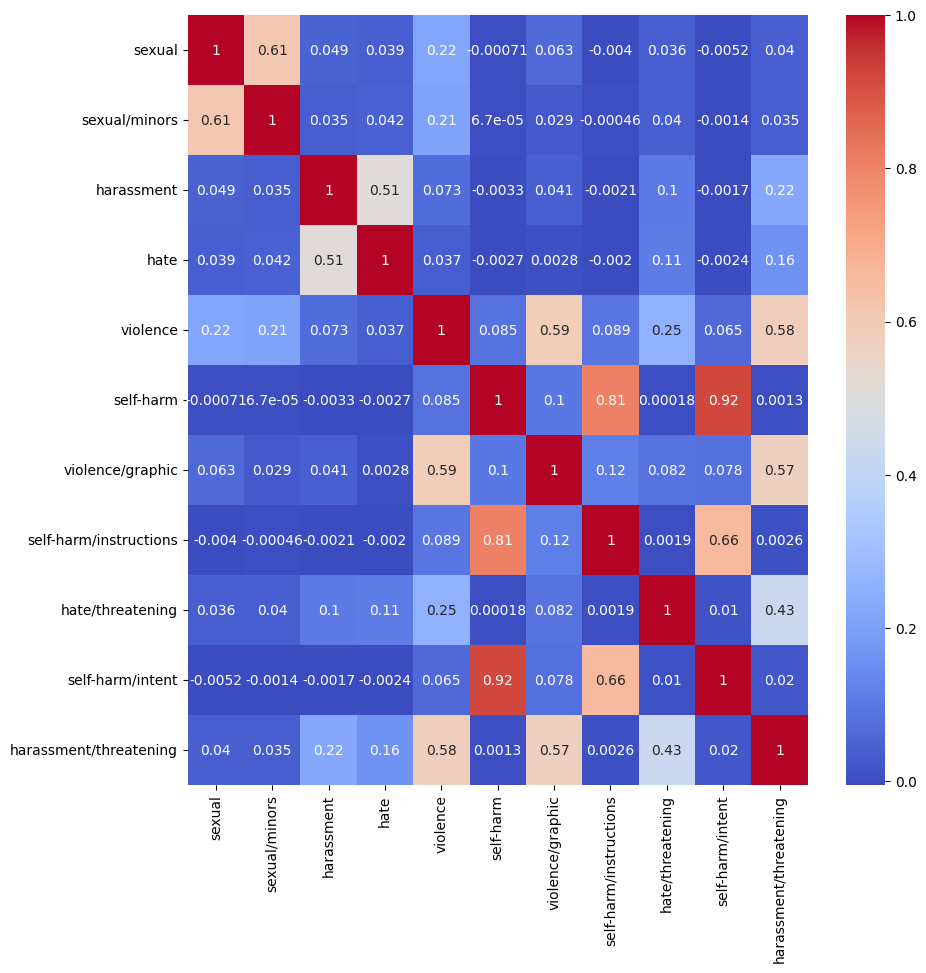

In [21]:

corr = df_train[CATEGORIES].corr()

# aggrandi le plot

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

On pour voir la correlation entre les variables, on peut utiliser la matrice de correlation. Par exemple hate et harrasment sont correlées.